In [1]:
%matplotlib inline
import numpy as np
from pathlib import Path
from scipy import ndimage
from matplotlib import pyplot as plt

text = Path("input.txt").read_text()

In [2]:
def to_array(text, c):
    arr = np.array([[c for c in line.strip()] for line in text.strip().splitlines()])
    return (arr == c).astype(np.uint8)

def to_text(seats, occupied):
    arr = np.zeros_like(seats, dtype='O')
    arr = np.where(seats, "L", ".")
    arr = np.where(occupied, "#", arr)
    return "\n".join("".join(line) for line in arr)

def step(seats, occupied):
    k = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    sum_occupied = ndimage.convolve(occupied, k, mode="constant", cval=0)
    no_neighbors_to_occupied = (occupied == 0) & (sum_occupied == 0) & seats
    too_many_neighbors = (occupied == 1) & (sum_occupied >= 4) & seats
    return occupied + no_neighbors_to_occupied - too_many_neighbors

### Part 1

In [3]:
def run_until_dupe(seats, occupied, step_func=step, callback=None):
    prev, curr = 1 - occupied, occupied.copy()
    i = 0
    while not (prev == curr).all():
        prev, curr = curr, step_func(seats, curr)
        if callback is not None:
            callback(i, seats, curr)
        i += 1
    return i, seats, curr

test = """
L.LL.LL.LL
LLLLLLL.LL
L.L.L..L..
LLLL.LL.LL
L.LL.LL.LL
L.LLLLL.LL
..L.L.....
LLLLLLLLLL
L.LLLLLL.L
L.LLLLL.LL
"""
occupied_test = to_array(test, "#")
seats_test = to_array(test, "L") | occupied_test
_, _, occ_test = run_until_dupe(seats_test, occupied_test)
assert occ_test.sum() == 37

In [4]:
occupied = to_array(text, "#")
seats = to_array(text, "L") | occupied
_, seats, occ = run_until_dupe(seats, occupied)
occ.sum()

2344

### Part 2

In [5]:
def sightlines(seats, occupied, r, c):
    in_sight = 0
    for v in (-1, 0, 1):
        for h in (-1, 0, 1):
            if v != 0 or h != 0:
                cc, rr = c, r
                while True:
                    cc, rr = cc + h, rr + v
                    in_bounds = 0 <= cc < seats.shape[1] and 0 <= rr < seats.shape[0]
                    if not in_bounds:
                        break
                    if seats[rr, cc]:
                        in_sight += occupied[rr, cc]
                        break
    return in_sight
                    

def step2(seats, occupied):
    adj = occupied.copy()
    for r, c in np.argwhere(seats):
        adj[r, c] = sightlines(seats, occupied, r, c)
    no_neighbors_to_occupied = (occupied == 0) & (adj == 0) & seats
    too_many_neighbors = (occupied == 1) & (adj >= 5) & seats
    return occupied + no_neighbors_to_occupied - too_many_neighbors

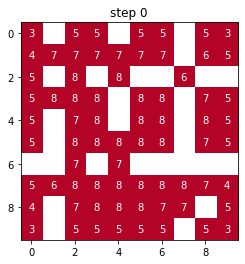

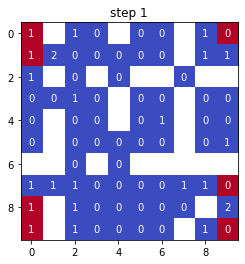

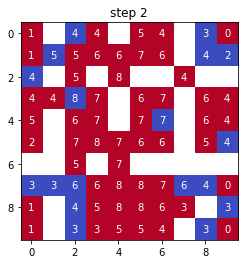

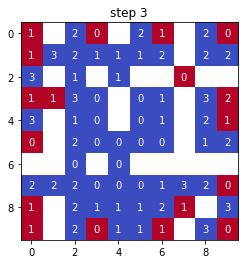

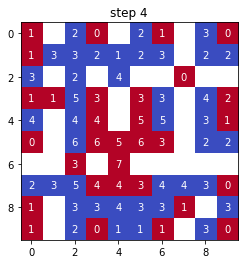

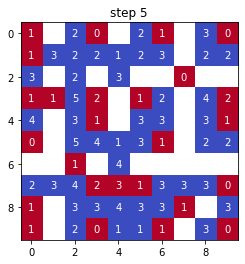

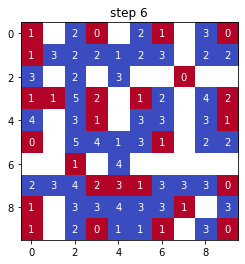

In [6]:
def _callback(i, seats, occupied):
    fig, ax = plt.subplots()
    ax.imshow(np.where(seats, occupied, np.nan), cmap="coolwarm", vmin=0, vmax=1)
    for r, c in np.argwhere(seats):
        text = ax.text(c, r, sightlines(seats, occupied, r, c), ha="center", va="center", color="w")
    plt.title(f"step {i}")
    plt.show()
    
_, _, occ_test = run_until_dupe(seats_test, occupied_test, step_func=step2, callback=_callback)
assert occ_test.sum() == 26

In [7]:
from tqdm import tqdm

with tqdm() as pbar:
    _, seats, occ = run_until_dupe(seats, occupied, step_func=step2, callback=lambda _i, _s, _o: pbar.update(1))
occ.sum()

87it [00:12,  6.95it/s]


2076